In [3]:
%matplotlib inline

In [4]:
# Data
import pandas as pd
import numpy as np

In [5]:
# Visualization
import seaborn as sns

In [6]:
import os
os.chdir("C:/Users/Lordzsolt/_PythonStuff/Kaggle/Titanic/")

In [7]:
trainDF = pd.read_csv("input/train.csv")
testDF = pd.read_csv("input/test.csv")
combine = pd.concat([trainDF, testDF], axis=0).reset_index(drop=True)

In [8]:
nulls = combine.isnull().sum().sort_values(ascending=False)
nulls = nulls[nulls > 0]
nulls

Cabin       1014
Survived     418
Age          263
Embarked       2
Fare           1
dtype: int64

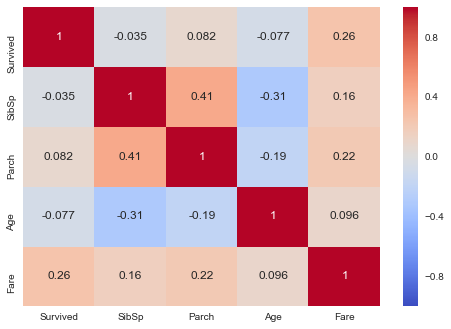

In [9]:
sns.heatmap(trainDF[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot=True, cmap='coolwarm')

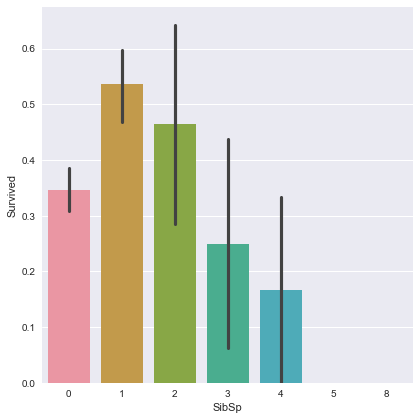

In [10]:
sns.factorplot(x='SibSp', y='Survived', data=trainDF, kind='bar', size=6)

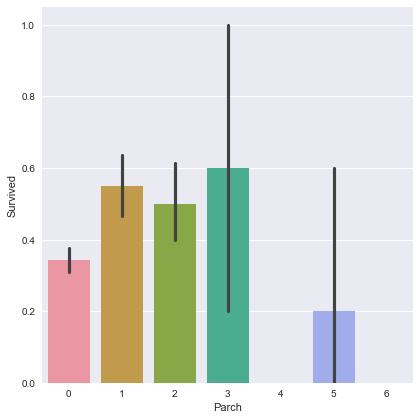

In [11]:
sns.factorplot(x='Parch', y='Survived', data=trainDF, kind='bar', size=6)

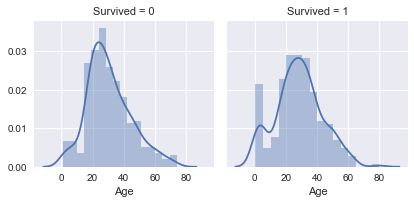

In [12]:
g = sns.FacetGrid(trainDF, col='Survived')
g = g.map(sns.distplot, "Age")

In [13]:
trainDF['Fare'] = trainDF['Fare'].fillna(trainDF['Fare'].median())

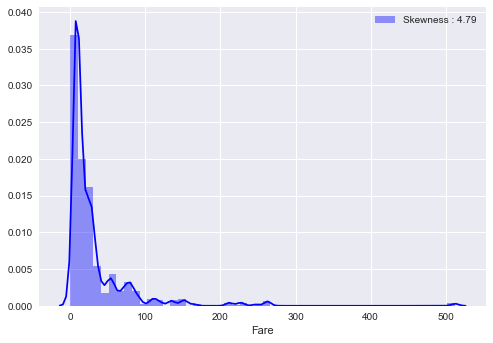

In [14]:
fares = trainDF['Fare']
g = sns.distplot(fares, color='b', label="Skewness : %.2f"%(fares.skew()))
g = g.legend(loc='best')

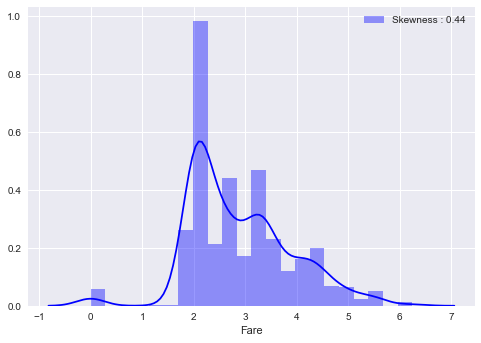

In [15]:
trainDF['Fare'] = fares.map(lambda x: np.log(x) if x > 0 else 0)

fares = trainDF['Fare']
g = sns.distplot(fares, color='b', label="Skewness : %.2f"%(fares.skew()))
g = g.legend(loc='best')

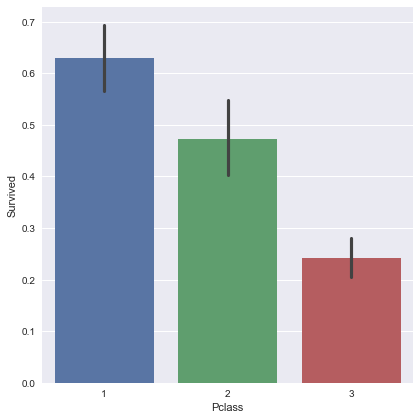

In [16]:
sns.factorplot(x='Pclass', y='Survived', data=trainDF, kind="bar", size=6)

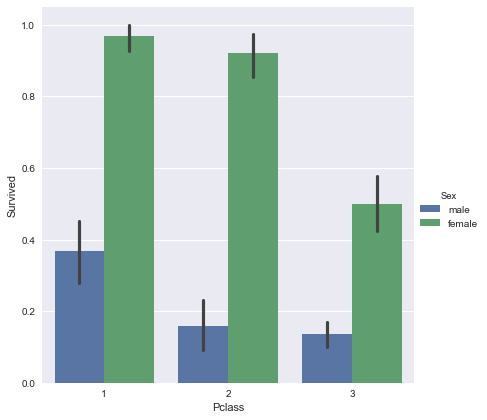

In [17]:
sns.factorplot(x='Pclass', y='Survived', hue='Sex', data=trainDF, kind="bar", size=6)

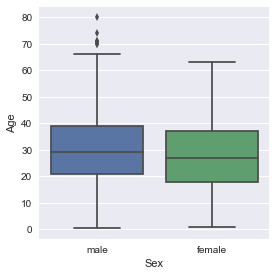

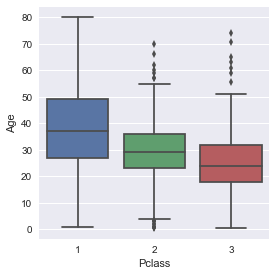

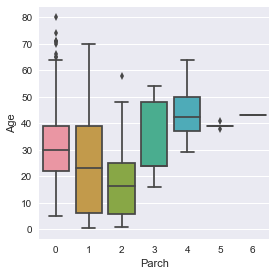

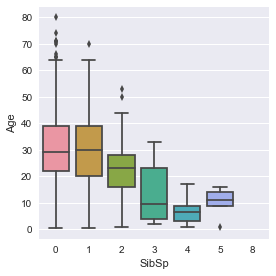

In [18]:
g = sns.factorplot(y='Age', x='Sex', data=trainDF, kind="box")
g = sns.factorplot(y='Age', x='Pclass', data=trainDF, kind="box")
g = sns.factorplot(y='Age', x='Parch', data=trainDF, kind="box")
g = sns.factorplot(y='Age', x='SibSp', data=trainDF, kind="box")